In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/shootings.csv')

In [37]:
# Are police shootings increasing year to year?
# Seperating df by year
df2015 = df[df['date'] < '2016-01-01'].sort_values('date')
df2016 = df[(df['date'] > '2015-12-31') & (df['date'] < '2017-01-01')].sort_values('date')
df2017 = df[(df['date'] > '2016-12-31') & (df['date'] < '2018-01-01')].sort_values('date')
df2018 = df[(df['date'] > '2017-12-31') & (df['date'] < '2019-01-01')].sort_values('date')
df2019 = df[(df['date'] > '2018-12-31') & (df['date'] < '2020-01-01')].sort_values('date')
df2020 = df[df['date'] > '2019-12-31'].sort_values('date')

In [149]:
# Number of shootings per year
shot2015 = df2015['name'].count()
shot2016 = df2016['name'].count()
shot2017 = df2017['name'].count()
shot2018 = df2018['name'].count()
shot2019 = df2019['name'].count()
shot2020 = df2020['name'].count()
total_per_year = [shot2015, shot2016, shot2017, shot2018, shot2019, shot2020]

904

Text(2018.1, 400, 'First Half of 2020 --->')

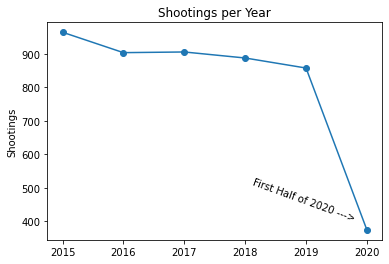

In [107]:
# Number of shootings per year graph
fig, ax = plt.subplots()
lines = ax.plot(range(2015, 2021), total_per_year, marker='o')
ax.set_ylabel('Shootings')
ax.set_title('Shootings per Year')
plt.text(2018.1, 400, 'First Half of 2020 --->', rotation=340)

In [390]:
# Shootings according to race
white = df[df['race'] == 'White'].count()
black = df[df['race'] == 'Black'].count()
hispanic = df[df['race'] == 'Hispanic'].count()
asian = df[df['race'] == 'Asian'].count()
native = df[df['race'] == 'Native'].count()
other = df[df['race'] == 'Other'].count()
races = [white['id'], black['id'], hispanic['id'], asian['id'], native['id'], other['id']]
races

[2476, 1298, 902, 93, 78, 48]

[Text(0, 0, ''),
 Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Native'),
 Text(0, 0, 'Other')]

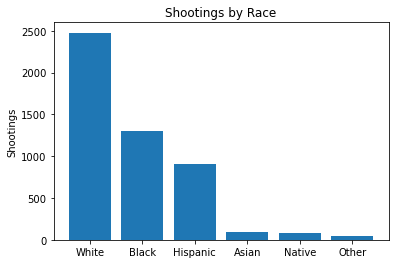

In [177]:
# Shootings according to race graph
race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
fig, ax = plt.subplots()
ax.bar(range(len(races)), races)
ax.set_ylabel('Shootings')
ax.set_title('Shootings by Race')
ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

Text(0.5, 1.0, 'Race in US')

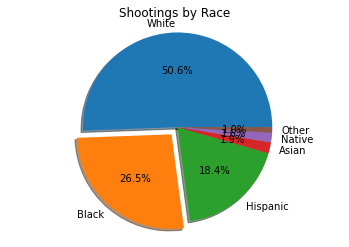

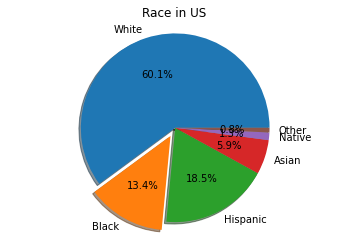

In [220]:
#Pie chart of shootings by race
sizes = [white['id']/sum(races), black['id']/sum(races), hispanic['id']/sum(races), asian['id']/sum(races), native['id']/sum(races), other['id']/sum(races)]
explode = (0, 0.1, 0, 0, 0, 0)

fig1, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=race_labels, autopct='%1.1f%%', pctdistance=.6, shadow=True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Shootings by Race')

# Pie chart of Races according to US Census Bureau
sizes2 = [60.1, 13.4, 18.5, 5.9, 1.3, .8]
explode = (0, 0.1, 0, 0, 0, 0)

fig1, ax = plt.subplots()
ax.pie(sizes2, explode=explode, labels=race_labels, autopct='%1.1f%%', pctdistance=.6, shadow=True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Race in US')

In [421]:
#Shootings by State
state_shootings = df.groupby('state').agg({'race':'count'}).sort_values(by='race', ascending=False)
# Most shooting states
ca = df[df['state']=='CA']
tx = df[df['state']=='TX']
fl = df[df['state']=='FL']
az = df[df['state']=='AZ']
co = df[df['state']=='CO']

In [ ]:
def shootings_by_race(dataframe):
    dataframe_white = dataframe[dataframe['race'] == 'White'].count()
    dataframe_black = dataframe[dataframe['race'] == 'Black'].count()
    dataframe_hispanic = dataframe[dataframe['race'] == 'Hispanic'].count()
    dataframe_asian = dataframe[dataframe['race'] == 'Asian'].count()
    dataframe_native = dataframe[dataframe['race'] == 'Native'].count()
    dataframe_other = dataframe[dataframe['race'] == 'Other'].count()
    dataframe_races = [dataframe_white['id'], dataframe_black['id'], dataframe_hispanic['id'], dataframe_asian['id'], dataframe_native['id'], dataframe_other['id']]
    return dataframe_races

<BarContainer object of 6 artists>

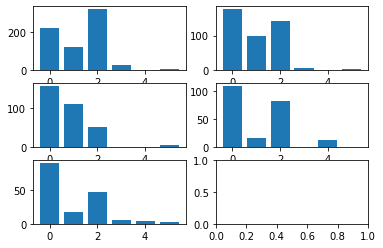

In [343]:
ca_races = shootings_by_race(ca)

race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
fig, ax = plt.subplots(3, 2)
ax[0,0].bar(range(len(races)), ca_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in California')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

ax[0,1].bar(range(len(races)), tx_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Texas')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

ax[1,0].bar(range(len(races)), fl_races)
ax[1,1].bar(range(len(races)), az_races)
ax[2,0].bar(range(len(races)), co_races)

In [344]:
# tx_races = shootings_by_race(tx)

# race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
# fig, ax = plt.subplots()
# ax.bar(range(len(races)), tx_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Texas')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

In [345]:
# fl_races = shootings_by_race(fl)

# race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
# fig, ax = plt.subplots()
# ax.bar(range(len(races)), fl_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Florida')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

In [346]:
# az_races = shootings_by_race(az)

# race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
# fig, ax = plt.subplots()
# ax.bar(range(len(races)), az_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Arizona')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

In [347]:
# co_races = shootings_by_race(co)

# race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
# fig, ax = plt.subplots()
# ax.bar(range(len(races)), co_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Arizona')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

In [425]:
blackdf = df[df['race']=='Black']

In [442]:
blackstate = blackdf['state'].value_counts().reset_index()

,index,state
0,CA,122
1,FL,111
2,TX,99
3,GA,71
4,LA,60
5,IL,58
6,OH,56
7,NC,51
8,MO,48
9,MD,47
